Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("EastWestAirlines.csv")
data 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [15]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
 def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
data_norm = norm_func(data.iloc[:,1:])
data_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# Hierarchical clustering

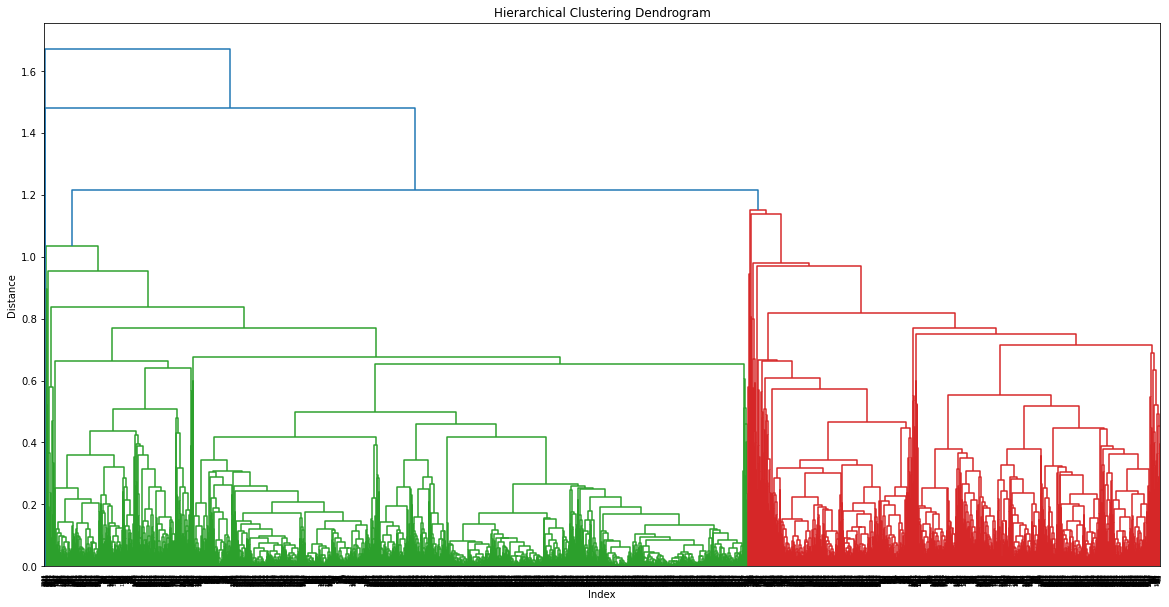

In [12]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(data_norm, method="average", metric="euclidean")
plt.figure(figsize=(20,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,)
plt.show() 

As the given dataset is huge. We are not able to use the hierarchical clustering. 

# K-Means Clustering

In [13]:
from sklearn.cluster import KMeans

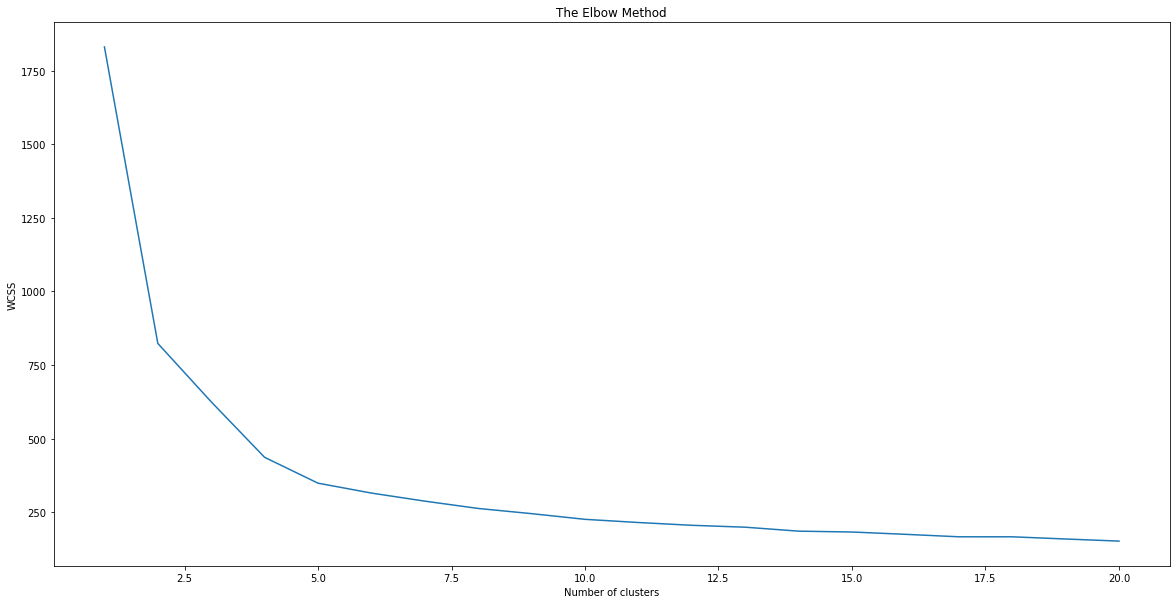

In [16]:
fig= plt.figure(figsize=(20,10))
WCSS= []
for i in range(1,21):
    clf= KMeans(n_clusters=i)
    clf.fit(data_norm)
    WCSS.append(clf.inertia_)
plt.plot(range(1,21),WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 

4 clusters

In [17]:
clf= KMeans(n_clusters=4)
kmeans_cluster= clf.fit_predict(data_norm) 

In [18]:
kmeans_cluster

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
kl=kmeans_cluster

In [46]:
import sklearn 
sklearn.metrics.silhouette_score(data_norm, kl)

0.47483765255961

In [19]:
cl=pd.DataFrame(kmeans_cluster,columns=['kmeans_cluster'])
cl

,kmeans_cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,2
3995,2
3996,1
3997,0


In [20]:
clf.cluster_centers_

array([[ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01,  3.33066907e-15],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -4.44089210e-16]])

In [21]:
clf.inertia_ #WCSS at k=4

436.7088576193261

In [22]:
data1=pd.concat([data,cl],axis=1)
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [23]:
data1.iloc[:,1:].groupby(data1.kmeans_cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster
kmeans_cluster,,,,,,,,,,,,
0,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0,0.0
1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0,1.0
2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0,2.0
3,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0,3.0


In [24]:
data1.iloc[:,1:].groupby(data1.kmeans_cluster).median() 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,kmeans_cluster
kmeans_cluster,,,,,,,,,,,,
0,25685.0,0.0,1.0,1.0,1.0,1500.0,4.0,0.0,0.0,3452.0,0.0,0.0
1,66966.5,0.0,4.0,1.0,1.0,38106.0,18.0,0.0,0.0,4917.5,1.0,1.0
2,39601.0,0.0,1.0,1.0,1.0,6027.0,8.0,100.0,1.0,4278.0,1.0,2.0
3,94938.0,0.0,3.0,1.0,1.0,26666.0,15.0,0.0,0.0,4423.0,0.0,3.0


In [25]:
WCSS

[1830.7932128584112,
 823.6756984125205,
 625.1768205797016,
 436.7088576193262,
 348.9433217254136,
 315.3155964842891,
 287.89506132579123,
 263.04891963882994,
 245.40611691088267,
 226.1081210825213,
 215.31090249849126,
 205.84790412598738,
 199.41048039370838,
 185.94875212062203,
 183.03976482341028,
 175.19918027753644,
 166.81692255563473,
 166.76761441438526,
 159.29461802430092,
 152.20810584628433]

In [26]:
df = data[(data1.kmeans_cluster==0)]
df 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
df = data[(data1.kmeans_cluster==1)]
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3931,3954,49519,0,3,1,1,25762,18,0,0,1522,1
3954,3977,33972,0,3,1,1,21029,29,0,0,1467,1
3973,3996,72297,0,3,1,1,16241,16,0,0,1587,1
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1


In [28]:
df = data[(data1.kmeans_cluster==2)]
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
17,18,13958,0,1,1,1,4291,5,0,0,6905,1
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1
29,30,19221,0,1,1,1,4655,8,500,1,7896,1
36,37,23193,0,1,1,1,650,4,550,3,7861,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3978,4001,10071,0,2,1,1,27701,16,0,0,1421,1
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1


In [29]:
df = data[(data1.kmeans_cluster==3)]
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
30,31,177926,0,3,1,1,20797,13,0,0,7886,0
32,33,276571,0,4,1,1,42044,23,0,0,7872,0
44,45,121260,0,3,1,1,18493,18,0,0,7808,0
56,57,75971,0,4,1,1,34339,14,0,0,6869,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0


# DBSCAN

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [36]:
neigh = NearestNeighbors(n_neighbors=22) #n_neighbors=2n, where n=no. of dimensions i.e., 11
nbrs = neigh.fit(data_norm)
distances, indices = nbrs.kneighbors(data_norm) 

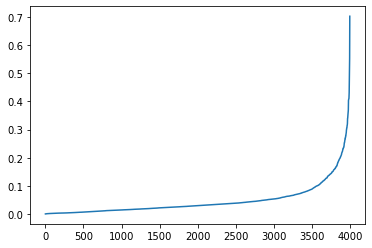

In [37]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

eps=0.1 approximately

In [38]:
dbscan = DBSCAN(eps=0.1, min_samples=12)
dbscan.fit(data_norm) 
#min_samples >=D+1, where D=11

DBSCAN(eps=0.1, min_samples=12)

In [39]:
dbscan.labels_

array([0, 0, 0, ..., 5, 0, 0], dtype=int64)

In [40]:
cl2=pd.DataFrame(dbscan.labels_,columns=['db_cluster'])

In [41]:
cl2

,db_cluster
0,0
1,0
2,0
3,0
4,4
...,...
3994,1
3995,1
3996,5
3997,0


In [42]:
data2=pd.concat([data,cl2],axis=1)
data2 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,db_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,5
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [43]:
dl = dbscan.labels_

In [44]:
import sklearn
sklearn.metrics.silhouette_score(data_norm, dl) 

0.11541559661059578